🔹 First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory us

C:\Users\Zaid\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


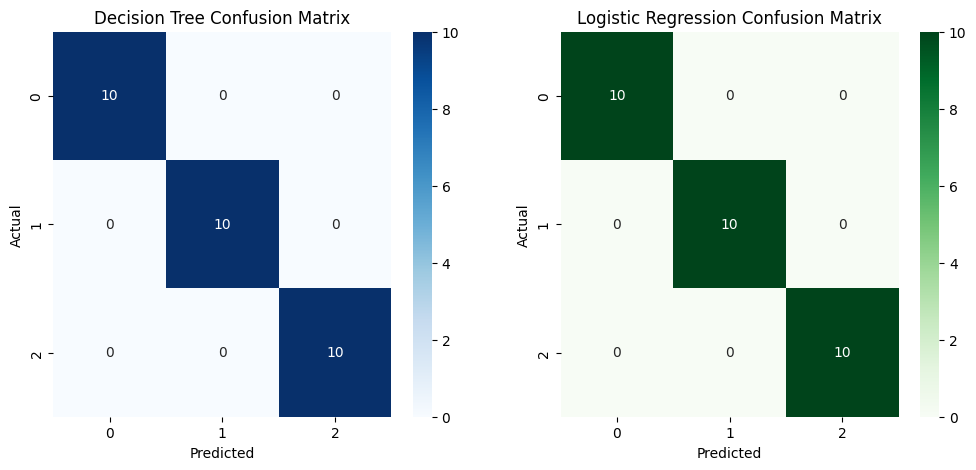

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = "Iris.csv"
df = pd.read_csv(file_path)

print("🔹 First 5 rows:")
print(df.head())
print("\n🔹 Dataset Info:")
print(df.info())
print("\n🔹 Shape:", df.shape)
print("\n🔹 Class Distribution:")
print(df.iloc[:, -1].value_counts())

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

if y.dtypes == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("\n🌳 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Decision Tree Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Logistic Regression Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")
plt.show()